# Problem Statement
# WHO has hired you for working on the dataset of COVID - 19. Aggregate data and within two days present your point of view to the joint committee on strategic planning to fight against COVID - 19 on

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as pl
from matplotlib import style
from datetime import date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# COVID - 19 India Dataset

In [2]:
#Read CSV File
data_csv = pd.read_csv('covid_19_india_latest.csv')

In [3]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3963 non-null   int64 
 1   Date                      3963 non-null   object
 2   Time                      3963 non-null   object
 3   State/UnionTerritory      3963 non-null   object
 4   ConfirmedIndianNational   3963 non-null   object
 5   ConfirmedForeignNational  3963 non-null   object
 6   Cured                     3963 non-null   int64 
 7   Deaths                    3963 non-null   int64 
 8   Confirmed                 3963 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 278.8+ KB


In [4]:
data_csv.describe()

,Sno,Cured,Deaths,Confirmed
count,3963.000000,3963.000000,3963.000000,3963.000000
mean,1982.000000,2791.492556,155.840020,5245.161746
std,1144.163887,9779.420988,685.676637,17698.383165
min,1.000000,0.000000,0.000000,0.000000
25%,991.500000,3.000000,0.000000,28.000000
50%,1982.000000,60.000000,3.000000,301.000000
75%,2972.500000,1224.500000,34.000000,2824.000000
max,3963.000000,127259.000000,9667.000000,230599.000000


In [5]:
dframe = pd.read_csv("covid_19_india_latest.csv")
dframe.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
dframe = pd.read_csv("covid_19_india_latest.csv")
dframe.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3958,3959,10/07/20,8:00 AM,Tripura,-,-,1338,1,1776
3959,3960,10/07/20,8:00 AM,Uttarakhand,-,-,2672,46,3305
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,-,-,21127,862,32362
3961,3962,10/07/20,8:00 AM,West Bengal,-,-,16826,854,25911
3962,3963,10/07/20,8:00 AM,Cases being reassigned to states,-,-,0,0,4161


In [7]:
pd.read_csv('covid_19_india_latest.csv', nrows = 3963)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
3958,3959,10/07/20,8:00 AM,Tripura,-,-,1338,1,1776
3959,3960,10/07/20,8:00 AM,Uttarakhand,-,-,2672,46,3305
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,-,-,21127,862,32362
3961,3962,10/07/20,8:00 AM,West Bengal,-,-,16826,854,25911


In [8]:
dframe_state_data = pd.pivot_table(data_csv, values = ['Confirmed', 'Cured', 'Deaths'], index = 'State/UnionTerritory', aggfunc = 'max')
dframe_state_data['Death Rate'] = round(dframe_state_data['Deaths'] / dframe_state_data['Confirmed'], 2)
dframe_state_data = dframe_state_data.sort_values(by = 'Confirmed', ascending = False).reset_index(level = 0)
dframe_state_data.style.background_gradient(cmap = 'Spectral')

,State/UnionTerritory,Confirmed,Cured,Deaths,Death Rate
0,Maharashtra,230599,127259,9667,0.040000
1,Tamil Nadu,126581,78161,1765,0.010000
2,Delhi,107051,82226,3258,0.030000
3,Gujarat,39194,27718,2008,0.050000
4,Uttar Pradesh,32362,21127,862,0.030000
5,Karnataka,31105,12833,486,0.020000
6,Telangana,30946,18192,331,0.010000
7,West Bengal,25911,16826,854,0.030000
8,Andhra Pradesh,23814,12154,277,0.010000
9,Rajasthan,22563,17070,491,0.020000


# A. Present state analytics – India
# COVID - 19 Kerala Data Subset

In [9]:
#Read CSV File
data1_csv = pd.read_csv('state_level_daily.csv')
data2_csv = pd.read_csv('patients_data.csv')
data3_csv = pd.read_csv('district_level_latest.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,12,13,14,15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
data_csv_kerala = data_csv[data_csv['State/UnionTerritory'] == "Kerala"]

In [11]:
data_csv_kerala.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 3943
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       163 non-null    int64 
 1   Date                      163 non-null    object
 2   Time                      163 non-null    object
 3   State/UnionTerritory      163 non-null    object
 4   ConfirmedIndianNational   163 non-null    object
 5   ConfirmedForeignNational  163 non-null    object
 6   Cured                     163 non-null    int64 
 7   Deaths                    163 non-null    int64 
 8   Confirmed                 163 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.7+ KB


In [12]:
data_csv_kerala.describe()

,Sno,Cured,Deaths,Confirmed
count,163.000000,163.000000,163.000000,163.000000
mean,1399.196319,550.239264,6.306748,1018.631902
std,1285.333107,826.862356,8.368320,1513.008302
min,1.000000,0.000000,0.000000,1.000000
25%,96.000000,3.000000,0.000000,16.000000
50%,1140.000000,270.000000,3.000000,402.000000
75%,2485.000000,570.000000,8.500000,1179.000000
max,3944.000000,3708.000000,27.000000,6534.000000


In [13]:
data_csv_kerala.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [14]:
data_csv_kerala.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3799,3800,06/07/20,8:00 AM,Kerala,-,-,3174,25,5429
3835,3836,07/07/20,8:00 AM,Kerala,-,-,3341,27,5622
3871,3872,08/07/20,8:00 AM,Kerala,-,-,3452,27,5894
3907,3908,09/07/20,8:00 AM,Kerala,-,-,3559,27,6195
3943,3944,10/07/20,8:00 AM,Kerala,-,-,3708,27,6534


In [15]:
data_csv_kerala = pd.read_csv('covid_19_india_latest.csv', index_col = 1, parse_dates = True, dayfirst = True)
start_date = '2020-01-30'
end_date   = '2020-07-10'
data_csv_kerala = data_csv_kerala.loc[start_date : end_date]
data_csv_kerala2 = data_csv_kerala.loc[(data_csv_kerala['State/UnionTerritory'] == 'Kerala')]
data_csv_kerala = pd.DataFrame(data_csv_kerala2)
data_csv_kerala = data_csv_kerala.reset_index()
data_csv_kerala.get(['Sno', 'Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'])
for data in data_csv_kerala.index:
    data_csv_kerala['Sno'][data], data_csv_kerala['Date'][data], data_csv_kerala['Time'][data], data_csv_kerala['State/UnionTerritory'][data], data_csv_kerala['ConfirmedIndianNational'][data], data_csv_kerala['ConfirmedForeignNational'][data], data_csv_kerala['Cured'][data], data_csv_kerala['Deaths'][data], data_csv_kerala['Confirmed'][data]
data_csv_kerala

,Date,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2,2020-02-01,3,6:00 PM,Kerala,2,0,0,0,2
3,2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
4,2020-02-03,5,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
158,2020-07-06,3800,8:00 AM,Kerala,-,-,3174,25,5429
159,2020-07-07,3836,8:00 AM,Kerala,-,-,3341,27,5622
160,2020-07-08,3872,8:00 AM,Kerala,-,-,3452,27,5894
161,2020-07-09,3908,8:00 AM,Kerala,-,-,3559,27,6195


In [16]:
data1_csv_kerala = data1_csv[data1_csv['State_Name'] == "Kerala"]

In [17]:
data1_csv_kerala.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 17 to 4619
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  119 non-null    int64 
 1   Date        119 non-null    object
 2   State       119 non-null    object
 3   Confirmed   119 non-null    int64 
 4   Deceased    119 non-null    int64 
 5   Recovered   119 non-null    int64 
 6   State_Name  119 non-null    object
dtypes: int64(4), object(3)
memory usage: 7.4+ KB


In [18]:
data1_csv_kerala.describe()

,Unnamed: 0,Confirmed,Deceased,Recovered
count,119.000000,119.000000,119.000000,119.000000
mean,2318.000000,58.411765,0.235294,32.100840
std,1345.358688,76.858930,0.499252,46.073522
min,17.000000,0.000000,0.000000,0.000000
25%,1167.500000,7.000000,0.000000,3.000000
50%,2318.000000,20.000000,0.000000,10.000000
75%,3468.500000,85.500000,0.000000,48.000000
max,4619.000000,416.000000,3.000000,209.000000


In [19]:
data1_csv_kerala.head()

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
17,17,01-Apr-20,KL,24,0,2,Kerala
56,56,01-Jul-20,KL,151,1,132,Kerala
95,95,01-Jun-20,KL,57,1,18,Kerala
134,134,01-May-20,KL,0,0,9,Kerala
173,173,02-Apr-20,KL,21,0,2,Kerala


In [20]:
data1_csv_kerala.tail()

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
4463,4463,30-Jun-20,KL,131,1,75,Kerala
4502,4502,30-Mar-20,KL,32,0,4,Kerala
4541,4541,30-May-20,KL,58,1,10,Kerala
4580,4580,31-Mar-20,KL,7,1,4,Kerala
4619,4619,31-May-20,KL,61,0,15,Kerala


In [21]:
data2_csv_kerala = data2_csv[data2_csv['Detected State'] == "Kerala"]

In [22]:
data2_csv_kerala.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 0 to 98809
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient Number                             1711 non-null   float64
 1   State Patient Number                       75 non-null     object 
 2   Date Announced                             1771 non-null   object 
 3   Estimated Onset Date                       0 non-null      float64
 4   Age Bracket                                259 non-null    object 
 5   Gender                                     253 non-null    object 
 6   Detected City                              205 non-null    object 
 7   Detected District                          1760 non-null   object 
 8   Detected State                             1771 non-null   object 
 9   State code                                 1771 non-null   object 
 10  Current Status         

In [23]:
data2_csv_kerala.describe()

,Patient Number,Estimated Onset Date,Num cases,Entry_ID,Num Cases
count,1711.000000,0.0,469.0,1302.000000,1302.000000
mean,53710.192285,NaN,1.0,43221.178955,2.788786
std,34606.954833,NaN,0.0,19474.685752,4.274670
min,1.000000,NaN,1.0,174.000000,-19.000000
25%,20485.500000,NaN,1.0,30038.250000,1.000000
50%,66924.000000,NaN,1.0,46231.500000,1.000000
75%,83022.500000,NaN,1.0,59600.750000,3.000000
max,99957.000000,NaN,1.0,70588.000000,40.000000


In [24]:
data2_csv_kerala.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num cases,Entry_ID,Num Cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN,NaN
34,35.0,KL-PT-P1,08/03/2020,NaN,24,M,Ranni,Pathanamthitta,Kerala,KL,...,India,Imported,27/03/2020,https://indianexpress.com/article/india/corona...,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,http://dhs.kerala.gov.in/wp-content/uploads/20...,Travel from Italy on 29/02/2020 through Doha,1.0,NaN,NaN
35,36.0,KL-PT-P1,08/03/2020,NaN,54,M,Ranni,Pathanamthitta,Kerala,KL,...,India,Imported,29/03/2020,https://www.indiatoday.in/india/story/coronavi...,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,http://dhs.kerala.gov.in/wp-content/uploads/20...,Travel from Italy on 29/02/2020 through Doha,1.0,NaN,NaN


In [25]:
data2_csv_kerala.tail()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num cases,Entry_ID,Num Cases
98805,99953.0,NaN,19/06/2020,NaN,NaN,NaN,NaN,Kottayam,Kerala,KL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70584.0,7.0
98806,99954.0,NaN,19/06/2020,NaN,NaN,NaN,NaN,Alappuzha,Kerala,KL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70585.0,4.0
98807,99955.0,NaN,19/06/2020,NaN,NaN,NaN,NaN,Thiruvananthapuram,Kerala,KL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70586.0,3.0
98808,99956.0,NaN,19/06/2020,NaN,NaN,NaN,NaN,Kozhikode,Kerala,KL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70587.0,3.0
98809,99957.0,NaN,19/06/2020,NaN,NaN,NaN,NaN,Kasaragod,Kerala,KL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70588.0,3.0


In [26]:
data3_csv_kerala = data3_csv[data3_csv['State'] == "Kerala"]

In [27]:
data3_csv_kerala.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 312 to 779
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SlNo             16 non-null     int64  
 1   State_Code       16 non-null     object 
 2   State            16 non-null     object 
 3   District_Key     16 non-null     object 
 4   District         16 non-null     object 
 5   Confirmed        16 non-null     int64  
 6   Active           16 non-null     int64  
 7   Recovered        16 non-null     int64  
 8   Deceased         16 non-null     int64  
 9   Migrated_Other   16 non-null     int64  
 10  Delta_Confirmed  16 non-null     int64  
 11  Delta_Active     16 non-null     int64  
 12  Delta_Recovered  16 non-null     int64  
 13  Delta_Deceased   16 non-null     int64  
 14  District_Notes   0 non-null      object 
 15  Last_Updated     0 non-null      float64
dtypes: float64(1), int64(10), object(5)
memory usage: 2.1+ KB


In [28]:
data3_csv_kerala.describe()

,SlNo,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,Last_Updated
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.0,16.0,16.0,0.0
mean,314.750000,434.437500,193.687500,238.750000,1.750000,0.250000,0.0,0.0,0.0,0.0,NaN
std,137.928242,260.287781,129.973699,154.941925,1.843909,0.447214,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
25%,302.750000,273.000000,117.000000,155.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
50%,306.500000,455.500000,201.000000,221.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,NaN
75%,310.250000,588.750000,254.250000,363.250000,2.250000,0.250000,0.0,0.0,0.0,0.0,NaN
max,745.000000,897.000000,452.000000,521.000000,5.000000,1.000000,0.0,0.0,0.0,0.0,NaN


In [29]:
data3_csv_kerala.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
312,0,KL,Kerala,KL_Other State,Other State,0,0,0,0,0,0,0,0,0,NaN,NaN
313,300,KL,Kerala,KL_Alappuzha,Alappuzha,501,258,241,1,1,0,0,0,0,NaN,NaN
314,301,KL,Kerala,KL_Ernakulam,Ernakulam,410,213,194,2,1,0,0,0,0,NaN,NaN
315,302,KL,Kerala,KL_Idukki,Idukki,186,99,87,0,0,0,0,0,0,NaN,NaN
316,303,KL,Kerala,KL_Kannur,Kannur,672,291,376,5,0,0,0,0,0,NaN,NaN


In [30]:
data3_csv_kerala.tail()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
323,310,KL,Kerala,KL_Pathanamthitta,Pathanamthitta,438,214,223,0,1,0,0,0,0,NaN,NaN
324,311,KL,Kerala,KL_Thiruvananthapuram,Thiruvananthapuram,633,433,195,5,0,0,0,0,0,NaN,NaN
325,312,KL,Kerala,KL_Thrissur,Thrissur,574,212,359,3,0,0,0,0,0,NaN,NaN
326,313,KL,Kerala,KL_Wayanad,Wayanad,140,58,81,1,0,0,0,0,0,NaN,NaN
779,745,KL,Kerala,KL_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN


# Data Visualization Using Matplotlib

In [31]:
data_csv_kerala.Date[0:158:15]

0     2020-01-30
15    2020-02-14
30    2020-02-29
45    2020-03-15
60    2020-03-30
75    2020-04-14
90    2020-04-29
105   2020-05-14
120   2020-05-29
135   2020-06-13
150   2020-06-28
Name: Date, dtype: datetime64[ns]

# Bar Plot

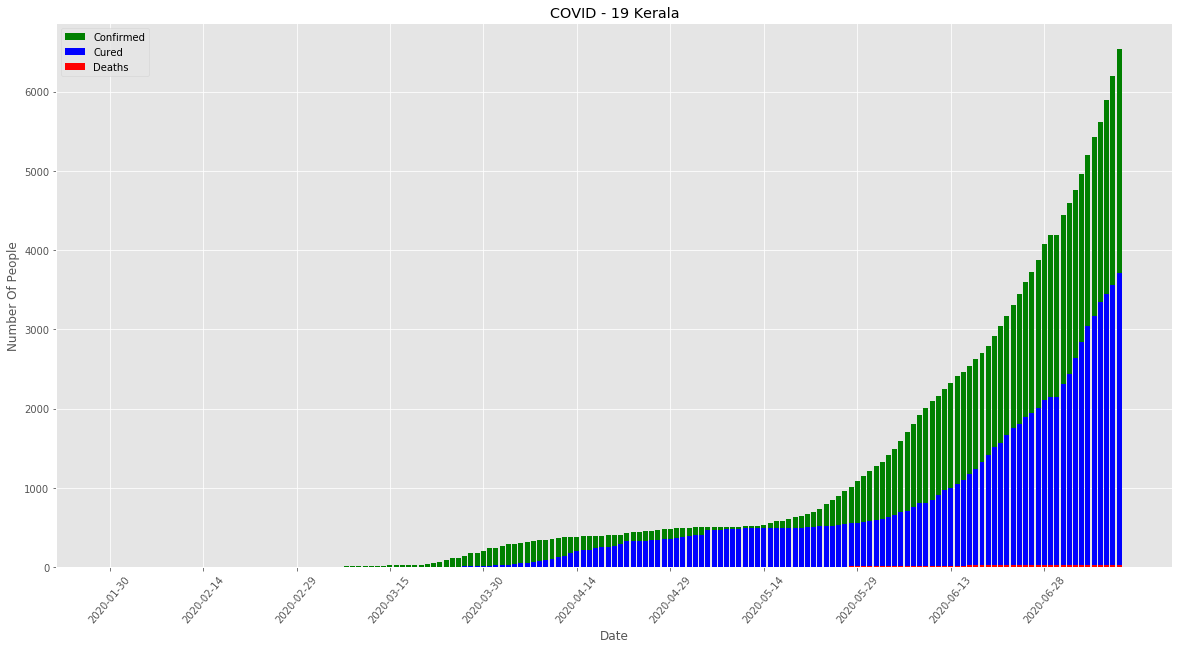

In [32]:
pl.style.use('ggplot')
pl.figure(figsize = (20, 10))
pl.bar(data_csv_kerala.Date, data_csv_kerala.Confirmed, color = 'green', label = 'Confirmed', linewidth = 2)
pl.bar(data_csv_kerala.Date, data_csv_kerala.Cured, color = 'blue', label = 'Cured', linewidth = 2)
pl.bar(data_csv_kerala.Date, data_csv_kerala.Deaths, color = 'red', label = 'Deaths', linewidth = 2)
pl.title('COVID - 19 Kerala')
pl.xlabel('Date')
pl.ylabel('Number Of People')
pl.xticks(data_csv_kerala.Date[0:158:15].tolist(), rotation = 50)
pl.legend()
pl.show()

# Line Plot

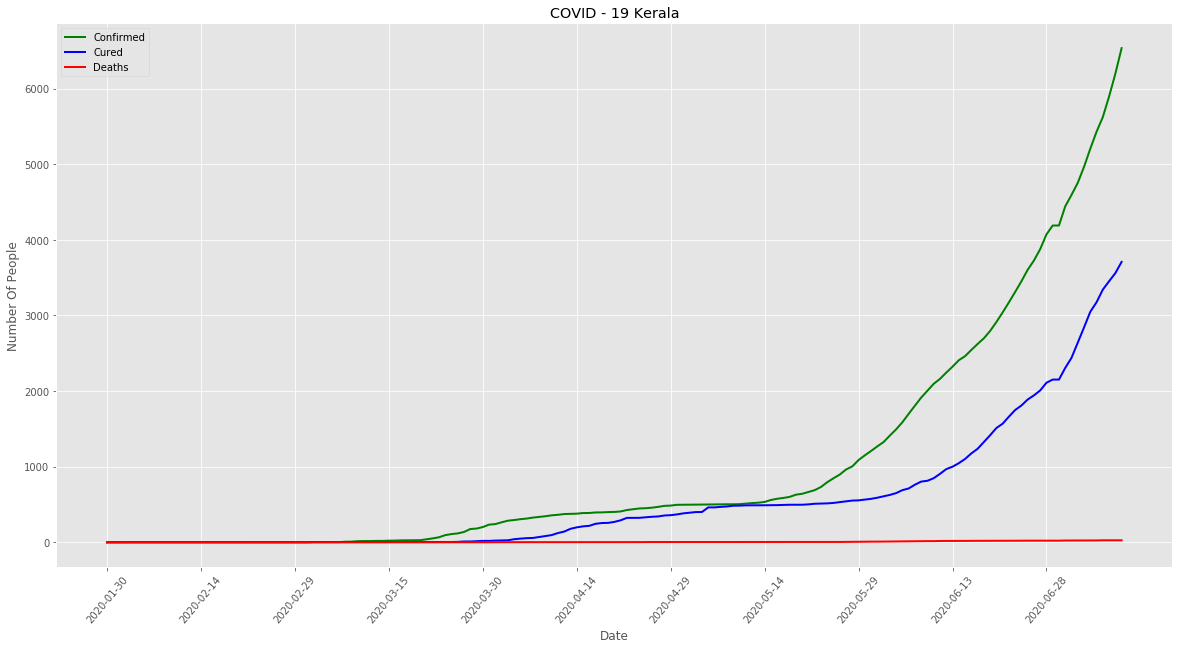

In [33]:
pl.style.use('ggplot')
pl.figure(figsize = (20, 10))
pl.plot(data_csv_kerala.Date, data_csv_kerala.Confirmed, color = 'green', label = 'Confirmed', linewidth = 2)
pl.plot(data_csv_kerala.Date, data_csv_kerala.Cured, color = 'blue', label = 'Cured', linewidth = 2)
pl.plot(data_csv_kerala.Date, data_csv_kerala.Deaths, color = 'red', label = 'Deaths', linewidth = 2)
pl.title('COVID - 19 Kerala')
pl.xlabel('Date')
pl.ylabel('Number Of People')
pl.xticks(data_csv_kerala.Date[0:158:15].tolist(), rotation = 50)
pl.legend()
pl.show()

# Scatter Plot

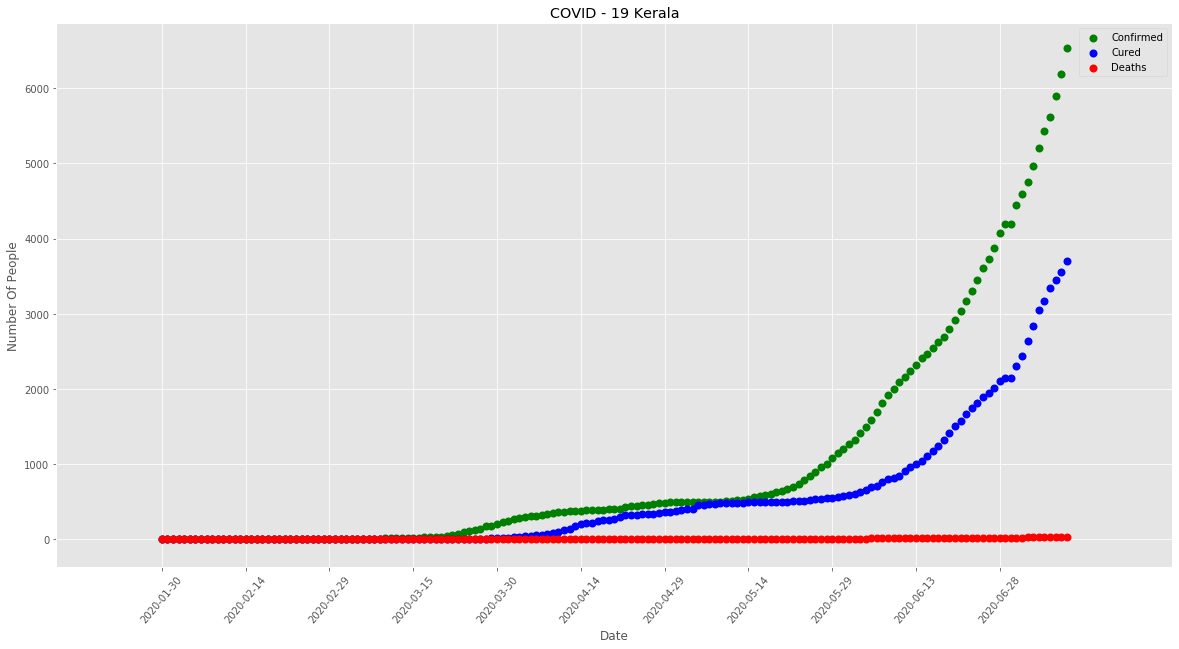

In [34]:
pl.style.use('ggplot')
pl.figure(figsize = (20, 10))
pl.scatter(data_csv_kerala.Date, data_csv_kerala.Confirmed, color = 'green', label = 'Confirmed', linewidth = 2)
pl.scatter(data_csv_kerala.Date, data_csv_kerala.Cured, color = 'blue', label = 'Cured', linewidth = 2)
pl.scatter(data_csv_kerala.Date, data_csv_kerala.Deaths, color = 'red', label = 'Deaths', linewidth = 2)
pl.title('COVID - 19 Kerala')
pl.xlabel('Date')
pl.ylabel('Number Of People')
pl.xticks(data_csv_kerala.Date[0:158:15].tolist(), rotation = 50)
pl.legend()
pl.show()

# Pie Chart

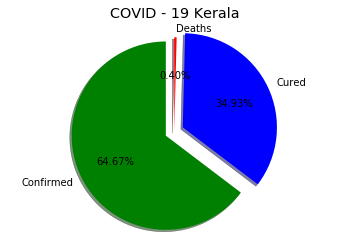

In [35]:
confirmed = sum(data_csv_kerala['Confirmed'])
cured = sum(data_csv_kerala['Cured'])
deaths = sum(data_csv_kerala['Deaths'])
group1 = [confirmed, cured, deaths]
group2 = [0.1, 0.1, 0]
group3 = ['Confirmed', 'Cured', 'Deaths']
group4 = ['green', 'blue', 'red']
pl.pie(group1, explode = group2, labels = group3, colors = group4, autopct = '%1.2f%%', shadow = True, startangle = 90)
pl.axis('Equal')
pl.title('COVID - 19 Kerala')
pl.show()

# B. Correlation heatmap for various parameters

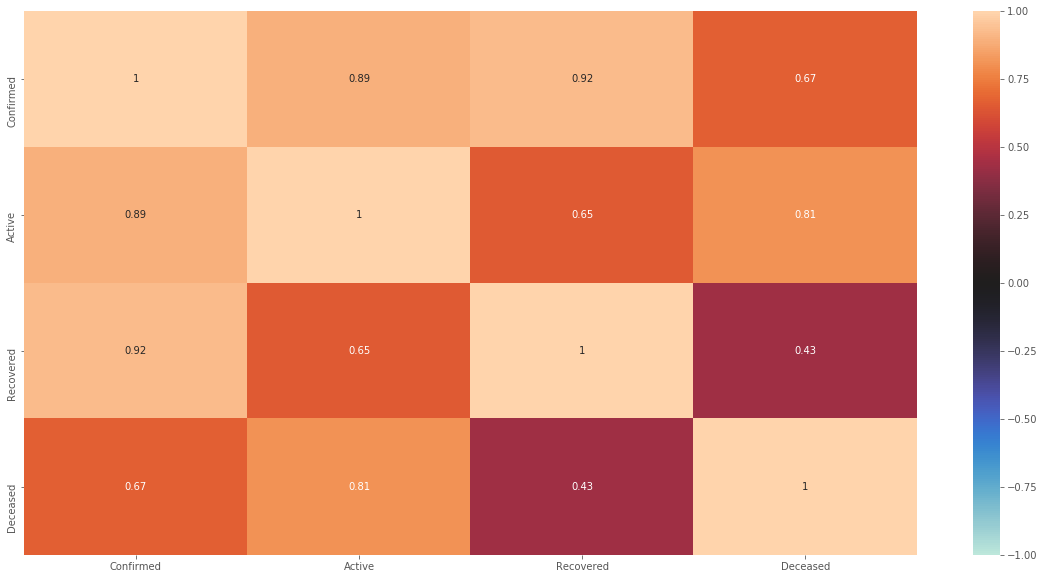

In [36]:
data3_csv_kerala = data3_csv_kerala[['Confirmed', 'Active', 'Recovered', 'Deceased']] 
corrmat = data3_csv_kerala.corr()
pl.style.use('ggplot')
pl.figure(figsize = (20, 10))
sn.heatmap(corrmat, annot = True, vmin = -1, vmax = 1, center = 0)

# C. Build a model for predicting the confirmed and recovered on any dates past 15th July 2020

In [37]:
#Read CSV File
data4_csv = pd.read_csv('state.csv')

In [38]:
data4_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    357 non-null    object
 1   Status  357 non-null    object
 2   TT      357 non-null    int64 
 3   AN      357 non-null    int64 
 4   AP      357 non-null    int64 
 5   AR      357 non-null    int64 
 6   AS      357 non-null    int64 
 7   BR      357 non-null    int64 
 8   CH      357 non-null    int64 
 9   CT      357 non-null    int64 
 10  DN      357 non-null    int64 
 11  DD      357 non-null    int64 
 12  DL      357 non-null    int64 
 13  GA      357 non-null    int64 
 14  GJ      357 non-null    int64 
 15  HR      357 non-null    int64 
 16  HP      357 non-null    int64 
 17  JK      357 non-null    int64 
 18  JH      357 non-null    int64 
 19  KA      357 non-null    int64 
 20  KL      357 non-null    int64 
 21  LA      357 non-null    int64 
 22  LD      357 non-null    in

In [39]:
data4_csv.describe()

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,3812.042017,0.694678,108.985994,1.280112,70.918768,69.165266,2.663866,19.263305,1.955182,0.0,...,35.184874,115.661064,0.602241,600.599440,145.008403,9.254902,157.915966,17.156863,126.994398,11.655462
std,5990.149998,2.143530,242.165795,4.208068,161.340058,115.763407,6.847386,37.392214,5.879713,0.0,...,75.681210,144.947898,3.325725,1059.181003,368.348184,22.810394,244.777458,33.875400,209.789742,194.796455
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-3.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-19.000000,-1295.000000
25%,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000
50%,520.000000,0.000000,15.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,...,5.000000,27.000000,0.000000,54.000000,9.000000,0.000000,25.000000,1.000000,14.000000,0.000000
75%,5049.000000,0.000000,75.000000,0.000000,38.000000,126.000000,3.000000,12.000000,0.000000,0.0,...,30.000000,222.000000,0.000000,759.000000,55.000000,4.000000,206.000000,15.000000,149.000000,0.000000
max,27762.000000,16.000000,1608.000000,37.000000,1202.000000,749.000000,79.000000,166.000000,50.000000,0.0,...,952.000000,716.000000,50.000000,4545.000000,2078.000000,151.000000,1338.000000,216.000000,1198.000000,1043.000000


In [40]:
dframe = pd.read_csv("state.csv")
dframe.head()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [41]:
dframe = pd.read_csv("state.csv")
dframe.tail()

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
352,09-Jul-20,Recovered,19408,9,1053,11,421,251,1,68,...,117,204,0,3994,913,14,796,22,535,0
353,09-Jul-20,Deceased,479,0,13,0,5,9,0,1,...,5,9,0,65,7,0,17,0,27,0
354,10-Jul-20,Confirmed,27762,0,1608,33,936,352,13,166,...,217,611,0,3680,1278,142,1338,68,1198,-224
355,10-Jul-20,Recovered,20289,9,1040,0,701,459,5,125,...,72,550,9,4163,1013,34,660,34,522,0
356,10-Jul-20,Deceased,520,0,15,0,8,2,0,2,...,4,6,0,64,8,0,27,0,26,0


In [42]:
pd.read_csv('state.csv', nrows = 357)

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,09-Jul-20,Recovered,19408,9,1053,11,421,251,1,68,...,117,204,0,3994,913,14,796,22,535,0
353,09-Jul-20,Deceased,479,0,13,0,5,9,0,1,...,5,9,0,65,7,0,17,0,27,0
354,10-Jul-20,Confirmed,27762,0,1608,33,936,352,13,166,...,217,611,0,3680,1278,142,1338,68,1198,-224
355,10-Jul-20,Recovered,20289,9,1040,0,701,459,5,125,...,72,550,9,4163,1013,34,660,34,522,0


In [43]:
data4_csv.columns

Index(['Date', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN',
       'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD',
       'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN',
       'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [44]:
x = data4_csv[['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN']].values  
x[0:5]

array([[81,  0,  1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0, 14,  0,  2,
         0,  6, 19,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  1,  3,  0,
         1,  1,  0, 12,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  4,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  2,  0,  1,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  1,  0,  0,  0,  0,  0]], dtype=int64)

In [45]:
y = data4_csv['Status'].values
y[0:5]

array(['Confirmed', 'Recovered', 'Deceased', 'Confirmed', 'Recovered'],
      dtype=object)

In [46]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.62373706, -0.32453617, -0.44654347, -0.3046312 , -0.44017774,
        -0.59830945, -0.38957995, -0.51589193, -0.33299692,  0.        ,
        -0.53463575, -0.41722886, -0.84237264, -0.47057974, -0.56162429,
        -0.56587247, -0.49814426, -0.37589416, -0.19824055, -0.27835396,
         0.        , -0.86965095, -0.63352822, -0.38689116, -0.15703169,
        -0.21667963, -0.32872659, -0.51703245, -0.38309254, -0.45232962,
        -0.77834302, -0.18133977, -0.56689176, -0.39150599, -0.40630124,
        -0.5969535 , -0.5071805 , -0.60619091, -0.05991803],
       [-0.63577367, -0.32453617, -0.45067867, -0.3046312 , -0.44017774,
        -0.59830945, -0.38957995, -0.51589193, -0.33299692,  0.        ,
        -0.54051953, -0.41722886, -0.84237264, -0.54864266, -0.56162429,
        -0.59259599, -0.49814426, -0.39352771, -0.48020021, -0.27835396,
         0.        , -0.86965095, -0.64194987, -0.38689116, -0.15703169,
        -0.21667963, -0.32872659, -0.51703245, -0.38309254, -0.

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print('Train set :', x_train.shape, y_train.shape)
print('Test set :', x_test.shape, y_test.shape)

Train set : (285, 39) (285,)
Test set : (72, 39) (72,)


In [48]:
k = 3
neighbors = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [49]:
yhat = neighbors.predict(x_test)  
yhat[0:5]

array(['Deceased', 'Deceased', 'Deceased', 'Deceased', 'Recovered'],
      dtype=object)

In [50]:
score = neighbors.score(x_test, y_test)
print('Model accuracy is {}'.format(score.round(2)))

Model accuracy is 0.69


# D. Build a classifier for severity gauging

In [51]:
#Read CSV File
data5_csv = pd.read_csv('PAML_COVID_Dataset Sheet1.csv')

In [52]:
data5_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3135 non-null   object
 1   Time                      3135 non-null   object
 2   State/UnionTerritory      3135 non-null   object
 3   ConfirmedIndianNational   3135 non-null   object
 4   Gender                    3135 non-null   object
 5   ConfirmedForeignNational  3135 non-null   object
 6   Age                       3135 non-null   int64 
 7   Serious symptoms          3135 non-null   object
 8   Less common symptoms      3135 non-null   object
 9   Most common symptoms      3135 non-null   object
 10  Severity                  3135 non-null   object
 11  Patient_Status            3135 non-null   object
dtypes: int64(1), object(11)
memory usage: 294.0+ KB


In [53]:
data5_csv.describe()

,Age
count,3135.000000
mean,52.181499
std,27.717842
min,5.000000
25%,28.000000
50%,52.000000
75%,76.000000
max,100.000000


In [54]:
dframe = pd.read_csv("PAML_COVID_Dataset Sheet1.csv")
dframe.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,77,loss of speech or movement,"a rash on skin, or discolouration of fingers o...",dry cough,Mild,flu
1,31/01/20,6:00 PM,Kerala,1,Female,0,23,chest pain or pressure,loss of taste or smell,dry cough,Seviour,Covid
2,1/2/2020,6:00 PM,Kerala,2,Male,0,90,difficulty breathing or shortness of breath,conjunctivitis,tiredness,Seviour,Covid
3,2/2/2020,6:00 PM,Kerala,3,Female,0,18,difficulty breathing or shortness of breath,diarrhoea,fever,Seviour,Covid
4,3/2/2020,6:00 PM,Kerala,3,Male,0,24,chest pain or pressure,diarrhoea,tiredness,Seviour,Covid


In [55]:
dframe = pd.read_csv("PAML_COVID_Dataset Sheet1.csv")
dframe.tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
3130,17/06/20,8:00 AM,Tripura,-,Male,-,66,chest pain or pressure,headache,fever,Moderate,Covid
3131,17/06/20,8:00 AM,Uttarakhand,-,Male,-,73,loss of speech or movement,loss of taste or smell,dry cough,Mild,Covid
3132,17/06/20,8:00 AM,Uttar Pradesh,-,Male,-,18,loss of speech or movement,conjunctivitis,dry cough,Seviour,Covid
3133,17/06/20,8:00 AM,West Bengal,-,Male,-,79,chest pain or pressure,headache,fever,Seviour,Covid
3134,17/06/20,8:00 AM,Cases being reassigned to states,-,Female,-,11,chest pain or pressure,loss of taste or smell,tiredness,Moderate,flu


In [56]:
pd.read_csv('PAML_COVID_Dataset Sheet1.csv', nrows = 3135)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,77,loss of speech or movement,"a rash on skin, or discolouration of fingers o...",dry cough,Mild,flu
1,31/01/20,6:00 PM,Kerala,1,Female,0,23,chest pain or pressure,loss of taste or smell,dry cough,Seviour,Covid
2,1/2/2020,6:00 PM,Kerala,2,Male,0,90,difficulty breathing or shortness of breath,conjunctivitis,tiredness,Seviour,Covid
3,2/2/2020,6:00 PM,Kerala,3,Female,0,18,difficulty breathing or shortness of breath,diarrhoea,fever,Seviour,Covid
4,3/2/2020,6:00 PM,Kerala,3,Male,0,24,chest pain or pressure,diarrhoea,tiredness,Seviour,Covid
...,...,...,...,...,...,...,...,...,...,...,...,...
3130,17/06/20,8:00 AM,Tripura,-,Male,-,66,chest pain or pressure,headache,fever,Moderate,Covid
3131,17/06/20,8:00 AM,Uttarakhand,-,Male,-,73,loss of speech or movement,loss of taste or smell,dry cough,Mild,Covid
3132,17/06/20,8:00 AM,Uttar Pradesh,-,Male,-,18,loss of speech or movement,conjunctivitis,dry cough,Seviour,Covid
3133,17/06/20,8:00 AM,West Bengal,-,Male,-,79,chest pain or pressure,headache,fever,Seviour,Covid


In [57]:
data5_csv.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'Gender ', 'ConfirmedForeignNational', 'Age ', 'Serious symptoms',
       'Less common symptoms', 'Most common symptoms', 'Severity',
       'Patient_Status '],
      dtype='object')

In [58]:
labelEncoder = LabelEncoder()
x[:, 0] = labelEncoder.fit_transform(x[:, 0])
x[:, 2] = labelEncoder.fit_transform(x[:, 2])
x[:, 5] = labelEncoder.fit_transform(x[:, 5])
x[:, 6] = labelEncoder.fit_transform(x[:, 6])
x[:, 7] = labelEncoder.fit_transform(x[:, 7])
x[:, 8] = labelEncoder.fit_transform(x[:, 8])
x[:, 9] = labelEncoder.fit_transform(x[:, 9])

In [59]:
x1 = pd.DataFrame(x)
x1

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,43.0,-0.324536,1.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.452330,-0.778343,-0.181340,-0.566892,-0.391506,-0.406301,-0.596954,-0.507181,-0.606191,-0.059918
1,8.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.792160,-0.181340,-0.567837,-0.394225,-0.406301,-0.629682,-0.507181,-0.606191,-0.059918
2,2.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.799069,-0.181340,-0.567837,-0.394225,-0.406301,-0.646046,-0.507181,-0.606191,-0.059918
3,18.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.792160,-0.181340,-0.567837,-0.388787,-0.406301,-0.641955,-0.507181,-0.606191,-0.059918
4,4.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.785252,-0.181340,-0.567837,-0.391506,-0.406301,-0.646046,-0.507181,-0.606191,-0.059918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,285.0,3.880039,131.0,2.313064,2.172880,113.0,1.0,38.0,10.0,0.0,...,1.082567,0.610308,-0.181340,3.208293,2.087887,0.208315,2.610451,0.143170,1.947561,-0.059918
353,117.0,-0.324536,13.0,-0.304631,-0.409144,9.0,0.0,1.0,0.0,0.0,...,-0.399402,-0.736891,-0.181340,-0.506383,-0.375194,-0.406301,-0.576498,-0.507181,-0.477310,-0.059918
354,300.0,-0.324536,137.0,7.548454,5.369376,127.0,13.0,75.0,14.0,0.0,...,2.405753,3.422155,-0.181340,2.911422,3.080188,5.827668,4.827815,1.502993,5.112303,-1.211450
355,291.0,3.880039,130.0,-0.304631,3.910781,134.0,5.0,67.0,18.0,0.0,...,0.487133,3.000723,2.528636,3.368074,2.359751,1.086339,2.054065,0.497906,1.885507,-0.059918


In [60]:
x1[1] = x1[1].replace('-', 0)
x1[3] = x1[3].replace('-', 0)

In [61]:
x = x1[[0, 1, 2, 3, 4, 5, 6, 7, 8]].values  
x[0:5]

array([[43.        , -0.32453617,  1.        , -0.3046312 , -0.44017774,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 8.        , -0.32453617,  0.        , -0.3046312 , -0.44017774,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 2.        , -0.32453617,  0.        , -0.3046312 , -0.44017774,
         0.        ,  0.        ,  0.        ,  0.        ],
       [18.        , -0.32453617,  0.        , -0.3046312 , -0.44017774,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 4.        , -0.32453617,  0.        , -0.3046312 , -0.44017774,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [62]:
y = x1[9].values
y = y.astype('int')
y[0:5]

array([0, 0, 0, 0, 0])

In [63]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.95366368, -0.32453617, -0.83162933, -0.3046312 , -0.44017774,
        -0.71812023, -0.52251838, -0.5497806 , -0.36399025],
       [-1.33314292, -0.32453617, -0.85641989, -0.3046312 , -0.44017774,
        -0.71812023, -0.52251838, -0.5497806 , -0.36399025],
       [-1.39819651, -0.32453617, -0.85641989, -0.3046312 , -0.44017774,
        -0.71812023, -0.52251838, -0.5497806 , -0.36399025],
       [-1.22472028, -0.32453617, -0.85641989, -0.3046312 , -0.44017774,
        -0.71812023, -0.52251838, -0.5497806 , -0.36399025],
       [-1.37651198, -0.32453617, -0.85641989, -0.3046312 , -0.44017774,
        -0.71812023, -0.52251838, -0.5497806 , -0.36399025]])

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print('Train set :', x_train.shape, y_train.shape)
print('Test set :', x_test.shape, y_test.shape)

Train set : (285, 9) (285,)
Test set : (72, 9) (72,)


In [65]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [66]:
yhat = knn.predict(x_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [67]:
print('Train set Accuracy :', metrics.accuracy_score(y_train, knn.predict(x_train)))
print('Test set Accuracy :', metrics.accuracy_score(y_test, yhat))

Train set Accuracy : 1.0
Test set Accuracy : 1.0
